# Import Libraries

Code Implement by :- Nishad Anil

In [1]:
# Import librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns       

In [2]:
# Import Dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check for Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# Check datatypes of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# Check statistical measure
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Check Classes of output values
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
# Import Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [8]:
inputs = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
classes = df['Species'].values

In [9]:
# Change Object to Numeric classes using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb_ec = LabelEncoder()
y = lb_ec.fit_transform(classes)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X_train, y_train, X_test, y_test = train_test_split(inputs,classes, train_size=0.75, random_state=1)

In [11]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train,X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
Prediction = Decision_Tree.predict(y_train)

In [13]:
# Prediction Using Classification_report 
from sklearn.metrics import classification_report
print(classification_report(y_test, Prediction, target_names = ['type0','type1','type2']))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00        13
       type1       1.00      0.94      0.97        16
       type2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [18]:
# Prediction Using Cross_Val_Score
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(Decision_Tree,inputs,y, cv=3)
accuracy_scores

array([0.98039216, 0.92156863, 0.97916667])

In [19]:
accuracy_scores.mean()

0.960375816993464

In [16]:
from sklearn.tree import plot_tree

Text(0.5, 1.0, 'The Tree created by Decision Tree')

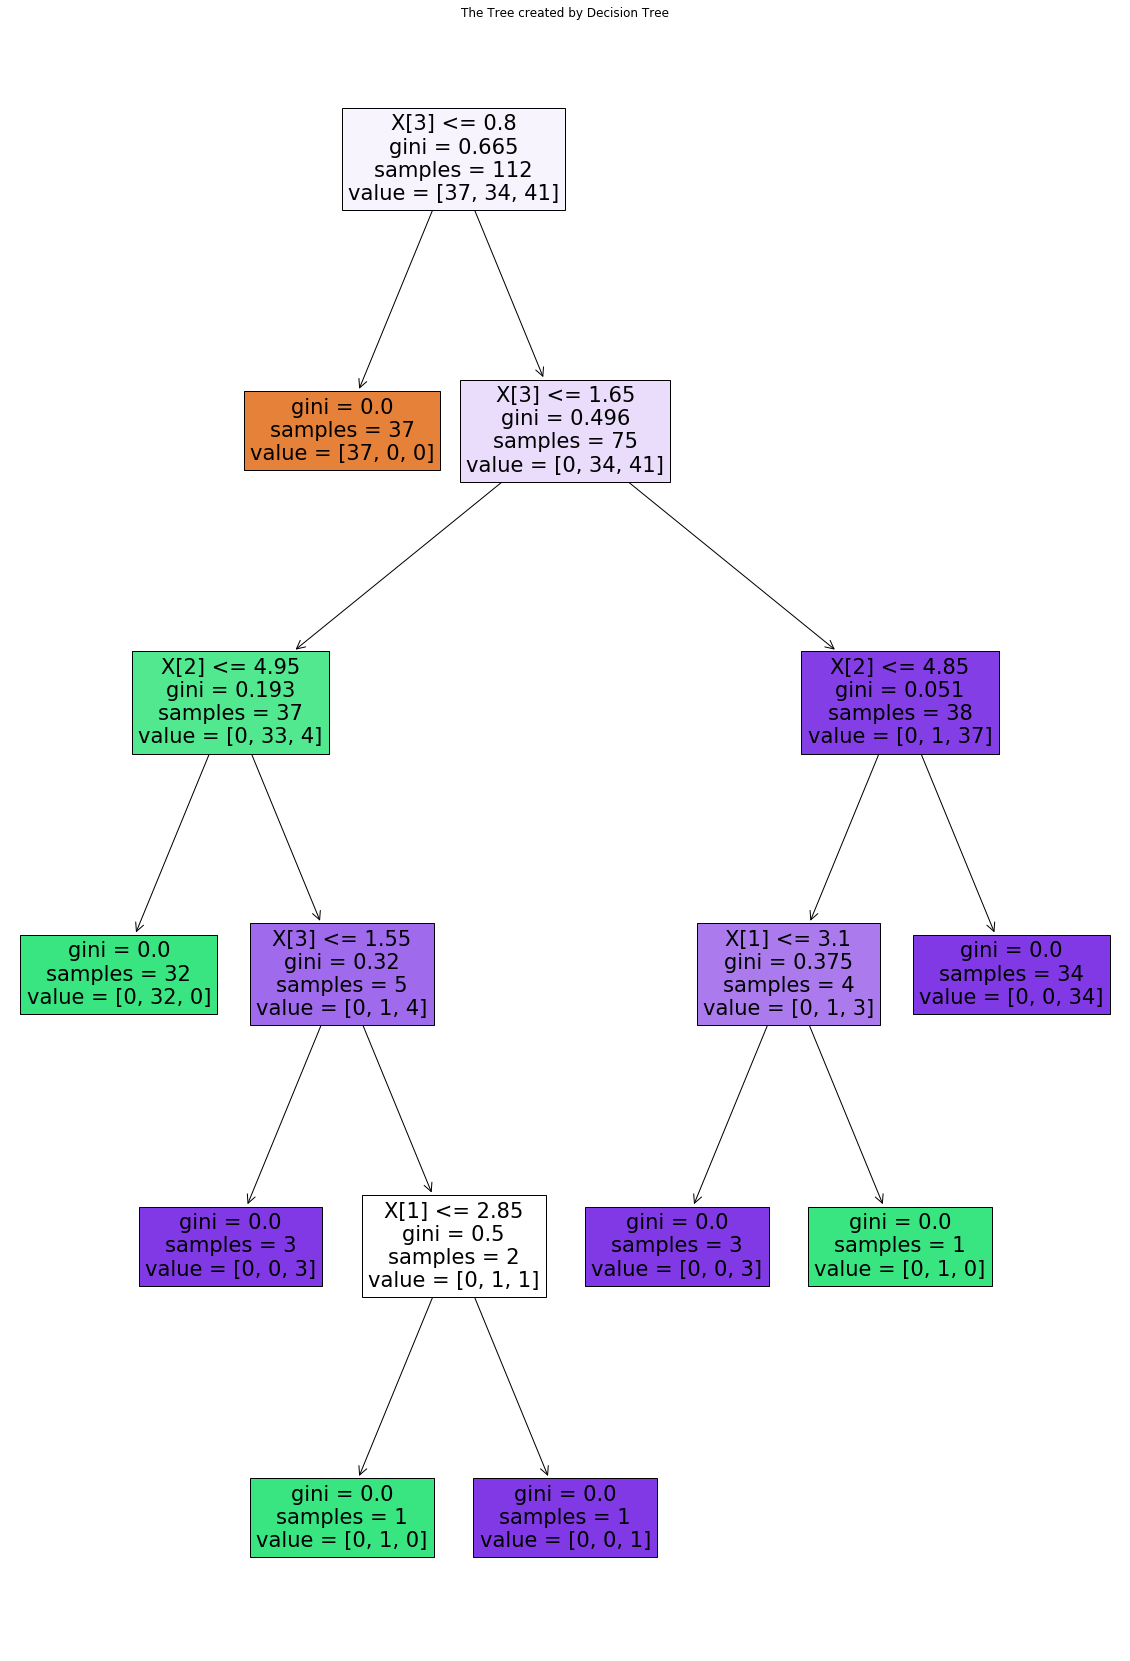

In [17]:
plt.rcParams["figure.figsize"] = 20,30

plot_tree(Decision_Tree,filled=True)
plt.title("The Tree created by Decision Tree")